In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, names=columns)

# Separate features and labels
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Encode the class labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)



In [6]:
X.shape

(150, 4)

In [7]:
X_test.shape

(30, 4)

In [2]:
# Create the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Train the model
epochs = 100
batch_size = 32

model.fit(X_train_scaled, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 2s 117ms/step - loss: 1.1410 - accuracy: 0.2500 - val_loss: 1.1058 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0350 - accuracy: 0.5000 - val_loss: 1.0351 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 0.9537 - accuracy: 0.7130 - val_loss: 0.9723 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 0.8754 - accuracy: 0.7963 - val_loss: 0.9162 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 30ms/step - loss: 0.8115 - accuracy: 0.8056 - val_loss: 0.8679 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 32ms/step - loss: 0.7509 - accuracy: 0.8241 - val_loss: 0.8241 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - loss: 0.6950 - accuracy: 0.8333 - val_loss: 0.7845 - val_accuracy: 0.6667
Epoch 8/100
4/4 [==

In [4]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 100ms/step - loss: 0.0422 - accuracy: 1.0000
Test Loss: 0.0422
Test Accuracy: 1.0000


1/1 [==============================] - 0s 128ms/step


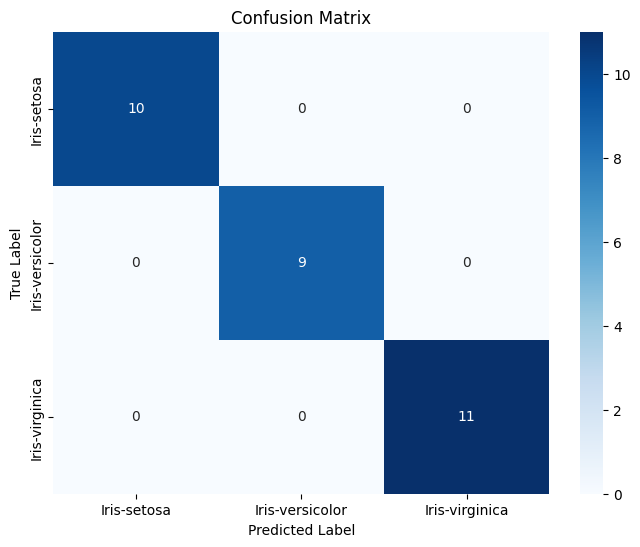

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the model predictions on the test data
y_pred_categorical = model.predict(X_test_scaled)

# Convert the categorical predictions back to class labels
y_pred_labels = np.argmax(y_pred_categorical, axis=1)
y_true_labels = np.argmax(y_test_categorical, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Get the class labels from the label encoder
class_labels = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
